<a href="https://colab.research.google.com/github/dekoska/machine-learning-bootcamp/blob/main/supervised/04_model_selection/02_cross_validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_moons
import plotly.express as px

np.random.seed(42)
sns.set(font_scale=1.3)

In [2]:
raw_data = make_moons(n_samples=700, noise=0.25, random_state=42)
data = raw_data[0]
target = raw_data[1]

In [4]:
df = pd.DataFrame(data=np.c_[data, target], columns=['x', 'y', 'target'])
df.head()

,x,y,target
0,-0.159950,1.036386,0.0
1,1.131141,-0.587636,1.0
2,0.169666,0.094209,1.0
3,0.517728,0.815187,0.0
4,-0.680021,0.155635,0.0


In [6]:
px.scatter(df, x='x', y='y', color='target', width=600, height=400)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target)

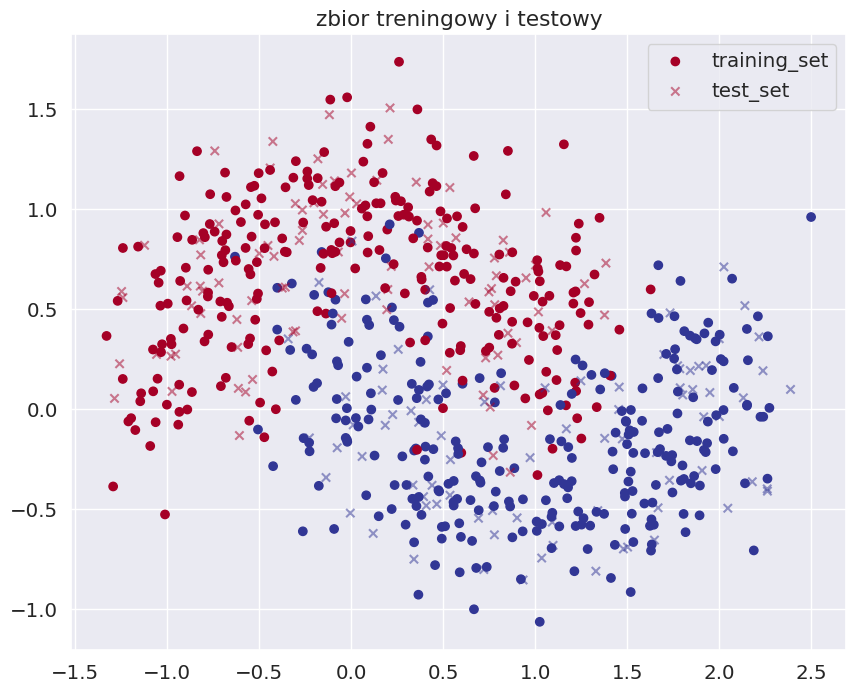

In [8]:
plt.figure(figsize=(10,8))
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='RdYlBu', label='training_set')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, cmap='RdYlBu', marker='x', alpha=0.5, label='test_set')
plt.title('zbior treningowy i testowy')
plt.legend()
plt.show()

In [11]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

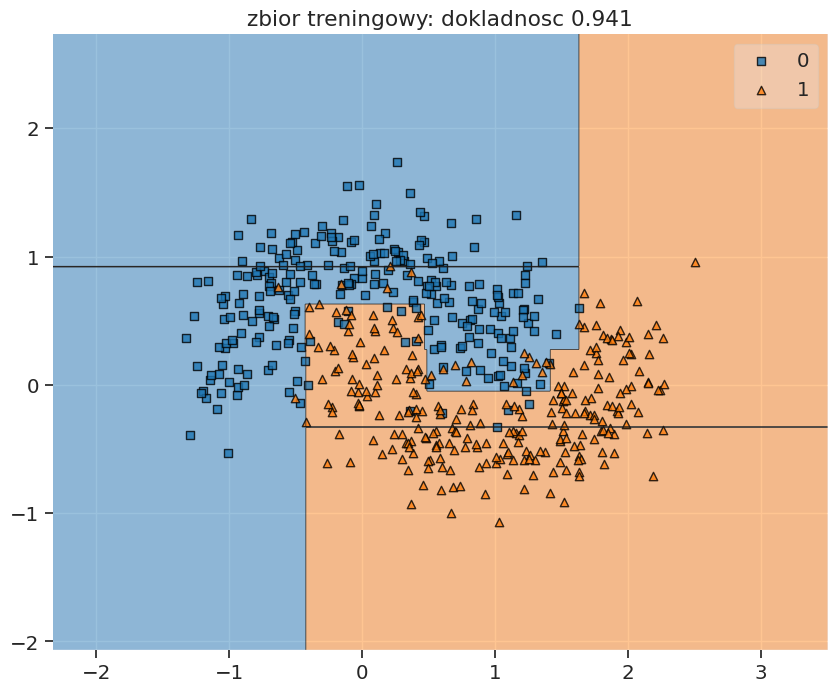

In [12]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize=(10,8))
plot_decision_regions(X_train, y_train, classifier)
plt.title(f'zbior treningowy: dokladnosc {classifier.score(X_train, y_train):.3f}')
plt.show()

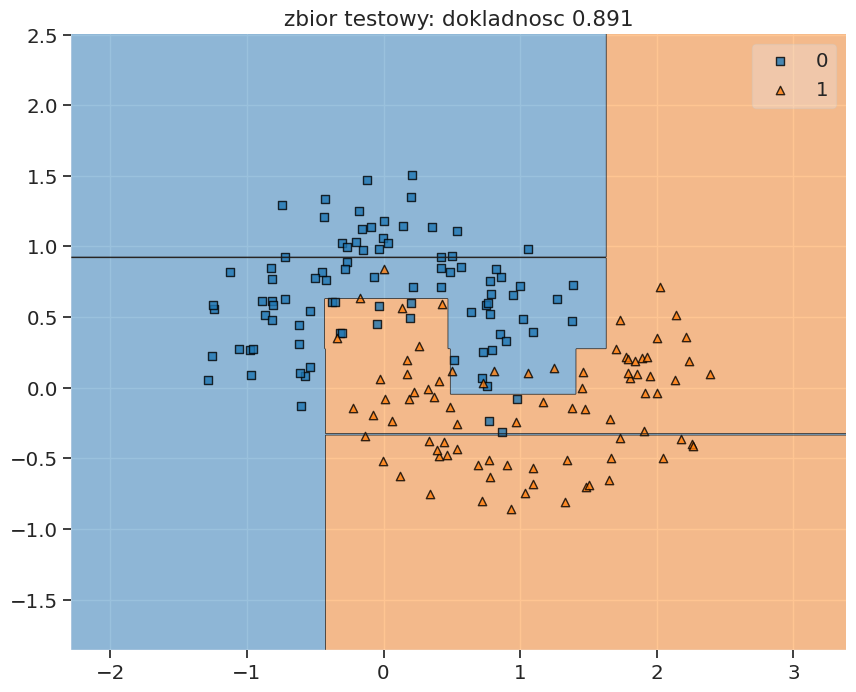

In [13]:
plt.figure(figsize=(10,8))
plot_decision_regions(X_test, y_test, classifier)
plt.title(f'zbior testowy: dokladnosc {classifier.score(X_test, y_test):.3f}')
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score

classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=5)
scores = cross_val_score(classifier, X_train, y_train, cv=10) #cv ile podzialow
scores

array([0.86792453, 0.88679245, 0.94339623, 0.9245283 , 0.98113208,
       0.92307692, 0.94230769, 0.96153846, 0.88461538, 0.88461538])

In [15]:
print(f'Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})')

Accuracy: 0.9200 (+/- 0.0359)


In [16]:
scores = pd.DataFrame(scores, columns=['accuracy'])
scores

,accuracy
0,0.867925
1,0.886792
2,0.943396
3,0.924528
4,0.981132
5,0.923077
6,0.942308
7,0.961538
8,0.884615
9,0.884615


In [17]:
px.bar(scores, y='accuracy', color='accuracy', width=700, height=400,
       title=f'Walidacja krzyżowa (15 podziałów) | Accuracy: {scores.mean()[0]:.4f} (+/- {scores.std()[0]:.3f})',
       color_continuous_scale=px.colors.sequential.Inferno_r, range_color=[scores.min()[0] - 0.01, 1.0])

<ipython-input-17-7c67887db925>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-17-7c67887db925>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

